# Installing chiLife
* Today we are going to cover the basics of chiLife for modeling NCAAs, particularly spin labels for use with SDSL EPR experimental data.
* chiLife works on Windows, Linux, and MacOS
* chiLife is supported for Python 3.8-3.12
* Today I will be running chiLife on Google colab -- Web based Jupyter Notebook for python
    * Requires no downloading or installing new programs on your personal machine.
    * If you are new to python I reccommand using colab alongside me
    > NOTE: Running chiLife locally will generally be faster easier if you are already familiar with the python ecosystem

* For those of you running locally: 
    * chiLife can be installed via `pip` or `conda`
    * Please make sure you have the most up to date chiLife version as we just released a new version: 0.3.0! 
    > NOTE: Windows users running Python 3.12 locally will have to manually install a dependency that is currently broken

## Clone workshop repo

In [ ]:
! git clone https://github.com/mtessmer/chilife_workshop.git

In [ ]:
cd chilife_workshop

In [ ]:
# If you are running Python 3.12 locally on windows you have to install rtoml first:
# ! pip install -U deps/rtoml-0.10.0-cp312-none-win_amd64.whl

! pip install -U chilife

#  While that downloads I will give you a quick overview of how we are going to run this workshop.

* Workshop will be split into 4 sections
    1) Basic spin labeling
    2) Spin labeling with proteins
    3) Scripting with chiLife
    4) Trajectories and custom rotamer libraries

* Each section will end with a Q&A and a short break.

# Basic spin label objects
This module is intended to teach the basics of creating a spin label and provide an overview of spin label features, methods and how they can be manipulated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chilife as xl

# The SpinLabel object

To create a basic spin label, all we need is to know the spin label name. If you have used other software, you may know that spin labels, even R1 have many different names

MMM: R1A  
MTSSLWizard: R1  
MDDS: CYR1  

Furthermore,  chiLife places a heavy emphasis on creating your own rotlibs and sharing a lot of rotlibs will have different names on everyones machine.
Available rotlibs may also be dependent on what directory you are in.

For this reason chiLife has a function `list_available_rotlibs`

In [2]:
xl.list_available_rotlibs()


********************************************************************************
*                     Rotlibs in chilife rotlib directory                      *
********************************************************************************
                                monofunctional:                                 
--------------------------------------------------------------------------------
I1M  : Iodoacetamide PROXYL spin label (MMM rotlib)
M1M  : Maleimide PROXYL spin label (MMM rotlib)
R1M  : MTSL/R1 spin label (MMM rotlib)
R7M  : Bromo-MTSL spin label (MMM rotlib)
TOC  : TOAC spin label made using CREST and GFN-FF
TRT  : Trityl spin label with OEt R group
V1M  : IDSL/V1 Spin label (MMM Rotlib)
--------------------------------------------------------------------------------
                                 bifunctional:                                  
--------------------------------------------------------------------------------
DCNip2  : dHis-Cu(II)-NTA in the ip2 c

If you wish to know more about a particular rotlib, use the `rotlib_info` function

In [3]:
xl.rotlib_info('R1M')


********************************************************************************
*  Rotamer Library Name:                                                  R1M  *
********************************************************************************
Rotamer Library Name: R1M
File: E:\07)Programming\Python\chiLife\src\chilife\data\rotamer_libraries\user_r
    otlibs\R1M_rotlib.npz
Description: MTSL/R1 spin label (MMM rotlib)
Comment: From MMM 2021

Length of library: 216
Dihedral definitions: 
    ['N' 'CA' 'CB' 'SG']
    ['CA' 'CB' 'SG' 'SD']
    ['CB' 'SG' 'SD' 'CE']
    ['SG' 'SD' 'CE' 'C3']
    ['SD' 'CE' 'C3' 'C4']
Spin atoms: ['N1' 'O1']
Number of atoms: N: 2, C: 12, O: 2, S: 2, H: 18
Number of heavy atoms: 18
Reference: 

Polyhach, Y.; Bordignon, E.; Jeschke, G. Rotamer Libraries of Spin 
    Labelled Cysteines for Protein Studies. Phys. Chem. Chem. Phys. 2010, 13 
    (6), 2356-2366. https://doi.org/10.1039/c0cp01865a.

Jeschke, G. MMM: A 
    Toolbox for Integrative Structure Modelin



chiLife is object oriented so the philosophy behind chilife is that we can create SpinLabel objects and use them for tasks like predicting experimental observables.  

We can create a SpinLabel object simply by calling the `xl.SpinLabel` constructor

In [4]:
R1M = xl.SpinLabel('R1M') # use_H=True to incude hydrogen atoms.


print(R1M)

Rotamer ensemble with 216 members
  Name: 1R1M
  Label: R1M
  Site: 1
  Dihedral definitions:
    ['N' 'CA' 'CB' 'SG']
    ['CA' 'CB' 'SG' 'SD']
    ['CB' 'SG' 'SD' 'CE']
    ['SG' 'SD' 'CE' 'C3']
    ['SD' 'CE' 'C3' 'C4']
  spin atoms:
    ['N1' 'O1']


In [5]:
xl.save(R1M)
# Open 1R1M.pdb in pymol.

Now we can explor some of the properties of the `SpinLabel` object  

<img src="https://github.com/mtessmer/chiLife_workshop/blob/main/img/Fig1.1.png?raw=true" style="width: 800px;"/>

In [6]:
print('name: ', R1M.name)
print('coords: ', R1M.coords.shape)
print('spin_center: ', R1M.spin_centers.shape)
print('dihedrals: ', R1M.dihedrals.shape)

name:  1R1M
coords:  (216, 18, 3)
spin_center:  (216, 3)
dihedrals:  (216, 5)


All of these are of course plotable.

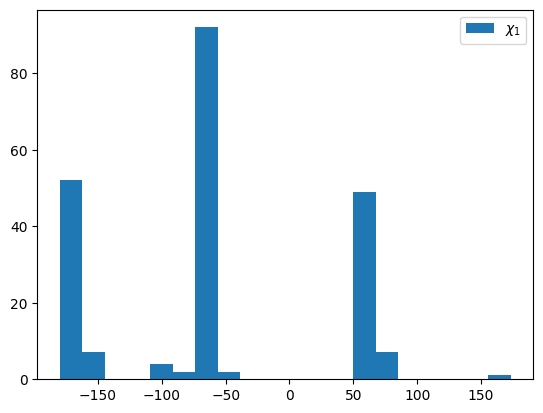

In [7]:
fig, ax = plt.subplots()
ax.hist(R1M.dihedrals[:,0], bins=20, label=r'$\chi_1$')
ax.legend()
plt.show()

The properties of a SpinLabel are mutable

In [9]:
# dihedrals and coords and weights are mutable!
# R1M.coords = R1M.coords + np.array([10, 10, 10])
# R1M.name += '2' # append 2 to name\
# xl.save('1R1M2.pdb', R1M)

R1M.dihedrals = R1M.dihedrals + [180, 0, 0, 0, 0]
R1M.name = R1M.name+ '180'
xl.save(R1M)

So it is easy to see how chiLife gives you very detailed, but simple control over the major features of the spin label objects. Using these kinds of detailed controls you can perform tasks to optimize rotamer librares:

eg: fit dihedrals, fit weights, create ensembles by sampling from a larger library.  

# Different label construction schemes

<img src="https://github.com/mtessmer/chiLife_workshop/blob/main/img/Fig1.2.png?raw=true" style="width: 800px;"/>

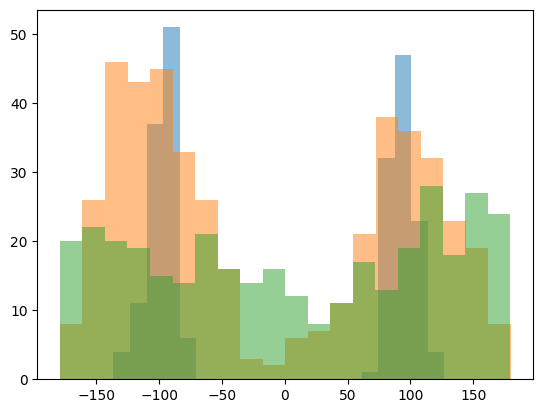

In [10]:
SL1 = xl.SpinLabel('R1M') 
SL2 = xl.SpinLabel('R1M', sample=500) 
SL3 = xl.SpinLabel('R1M', sample=500, dihedral_sigmas=np.inf)

fig, ax = plt.subplots()
ax.hist(SL1.dihedrals[:,2], alpha=0.5, bins=20)
ax.hist(SL2.dihedrals[:,2], alpha=0.5, bins=20)
ax.hist(SL3.dihedrals[:,2], alpha=0.5, bins=20)
plt.show()

* But wait,! There's more!
* We can even sample on a per-dihedral basis
* Those of you familiar with R1 spin label dynamics know that oftentimes most of the structural variability of R1 comes only from $\chi_{4/5}$.
* chiLife can emulate this by setting only some dihedrals to sample.

In [11]:

R1M = xl.SpinLabel('R1M', sample=100, dihedral_sigmas=[0, 0, 0, 40, np.inf])   
xl.save('R1M_partial_sample.pdb', R1M) 


* This can also be useful with very large spin labels that have some highly flexible sites and some less flexible sites.  


## Emulating MMM and mtsslWizard
* Those of you who have used the accessibale volume and rotamer library approaches before probably know they come from mtsslWizard and MMM respectivly.
* While chilife uses the same principals of rotamer ensemble constructure from these applications, a lot of the default parameters are different.
* To more accuratly mimic mtsslWizard and MMM you can use the from_wizard and from_mmm class methods.

In [12]:
R1M = xl.SpinLabel.from_mmm('R1M')
R1M = xl.SpinLabel.from_wizard('R1M')